# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Ann-Kristin Bergmann*
* *Nephele Aesopou*
* *Ewa Miazga*
* *Mai*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [145]:
# Import useful packages
import requests
import random
import numpy as np
import matplotlib.pyplot as plt


In [146]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster050.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'a5771bce93e200c36f7cd9dfd0e5deaa'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data)

{'age': 13, 'friends': ['0065470d21f5f095cc304a048984387a', '634f079997d1329f9504e68870b33a9f', '6005f35032ccbc32c007209c9547a709', '08f3a0aaa93613f038951a575d280c7f', 'c55d0ff1eae9cddaf7210e9c71723525', '6a69bc21b975da2f1cdbbae760b39c07', 'a71e2294bc054a5da616e95b62e56b7e', '38b924a395511befa9220c1e8d1ef5c0', '4d99132299edfc28685448a96897747a', '1a89c02b4ff39b25f2f39fdfb6cbdbd2', 'd626f6fef9b29cb8dfad7d934a3cc54d', '34e697ef81b7b1bd545f98db5838e381', 'f0bdd1272e789cbda23d05793eaa6a34', 'f5729dfe71e7fba947dda59e5dcda6ec', '65577359f97d8439213634b003f3b861', '203dad9f8a7f800dc989c4c7b8de99b3', 'ddce98067818fc80b34d75d33c03ad5e', '0febaab403c822fb433e0a2342cdc4af', '872c6bf367b74a78571bd45fda388e64', '003efe2da6eec0b3be2633b06332e449', '87fbfee43e31e758b6bc53765e51357a', 'e4210f5867c8f1365b0cfbb59033c099', 'c5c3abb93877757fe8be1853faadb5ab', '3d56b1a1925d4b54ec6a196b81a0f7f4', '0b3be23e4183de00ae3ce94938f254a3', '5de130190b5765ec1df570346a7ddb44', '4f2b867da90cfc884b7c0cd516663dfa', '442

Crawl the Facebook graph to estimate the average age of users in the social network using the random walk approach of Algorithm 2.1,starting from node "a5771bce93e200c36f7cd9dfd0e5deaa".

What is your estimation of the average age of a Facebook user? 
How many users did you visit to get this estimation?

In [147]:
# Random Walk algorithm. N defines the number of users we want to visit.
def RW(source_node, N):
    # use the same seed
    random.seed(0)
    
    current_node = source_node
    i = 0
    ages = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        # Get age of current node and append it to the list of ages
        current_age = data['age']
        ages.append(current_age)
        # Choose at random a friend of the current node
        current_node = random.choice(data['friends'])
        i += 1
        
    average_age = np.mean(ages)
    print('Average age', average_age)
    return average_age, ages

Average age 24.87
Average age 23.8
Average age 23.11
Average age 22.344
Average age 21.57
Average age 21.614285714285714
Average age 22.0375
Average age 21.675555555555555
Average age 21.9
Average age 21.78181818181818


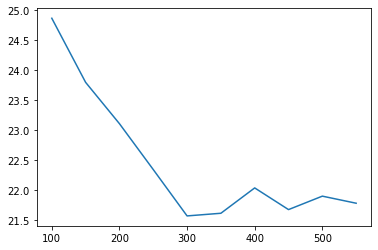

In [148]:
# Plot graph to investigate convergence
N = np.arange(100,600,50)
walks = [RW('a5771bce93e200c36f7cd9dfd0e5deaa', n)[0] for n in N]
plt.plot(N, walks)

In [149]:
# Check convergence of algorithm and print the average Facebook user age.
def find_average_age(source_node, N, epsilon, max_iters):
    temp_node = RW(source_node,1)[0]
    n = 0 # initialize iteration counter

    while (n < max_iters):
        current_node = RW('a5771bce93e200c36f7cd9dfd0e5deaa', N)[0]
        if (abs(temp_node - current_node) > epsilon):
            temp_node = current_node
            n +=1
            N += 50
        else:
            print("The algorithm converged and the mean user age is", np.around(current_node))
            print("Number of users visited is", N)
            break 

In [150]:
find_average_age(user_id, 10, 0.4, 200) # N = 350

Average age 13.0
Average age 15.1
Average age 29.883333333333333
Average age 24.87272727272727
Average age 24.45
Average age 22.761904761904763
Average age 22.21153846153846
Average age 21.490322580645163
Average age 21.558333333333334
The algorithm converged and the mean user age is 22.0
Number of users visited is 360


1. Our average of 22 years old is not as close as we would like to 45 years old. 

In [151]:
# Check frequency of ages in RW
# Same algorithm as RW but calculates the frequency of each unique age value and plots it as a bar graph.
def RW_freq(source_node, N):
    ages = RW(source_node=source_node, N=N)[1]

    ages, counts = np.unique(ages, return_counts=True)
    plt.bar(ages, counts)

Average age 21.9


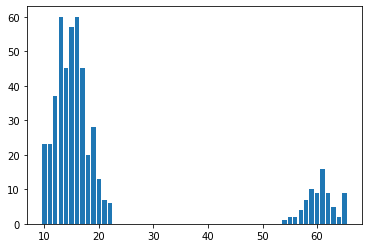

In [152]:
RW_freq(user_id, 500)

In [153]:
# Function that plots the age of each user at every iteration of the RW
def ages_plot(source_node, N):
    ages = RW(source_node=source_node, N=N)[1]
    plt.plot(ages)

Average age 21.9


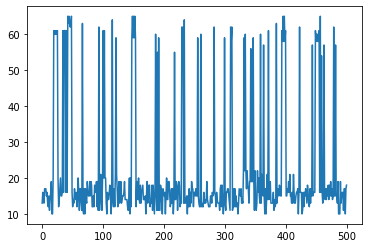

In [154]:
ages_plot(user_id, 500)

2. How would you explain the discrepancy?

Plotting the frequency of ages that we reach from the starting node, we can clearly see that there is a big gap in ages from about 30 to 50. Thus, with the current RW algorithm I would require more older ages reached if I require for an average age of 45.


It is also evident that (according to the caluclated mean) more nodes/facebook users reached by the RW are of the age around 20, that's why the frequency is much higher there.


It may have something to do with the fact that the starting node is of age 13. Thus, the starting node's friends are always around its age 10-20 and it also may have its parents' friends that are about 50-60 years old.


Plotting the results over time gives us the same result. No ages are reached betweem 30 and 50 years old. 



In [155]:
# Plot a graph to investigate the relationship between node degree
# and frequency

def RW_degrees(source_node, N):
    random.seed(0)
    current_node = source_node
    i = 0
    degrees = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        current_node_degree = len(data['friends'])

        # To investigate the age of the degrees that have many friends in Facebook:
        if current_node_degree > 300:
            print('Current user has', current_node_degree, 'friends and his age is', data['age'])
        degrees.append(current_node_degree)
        current_node = random.choice(data['friends'])
        i += 1

    degree, counts = np.unique(degrees, return_counts=True)
    print('Degrees encountered:', degree)
    plt.plot(degree, counts)

Current user has 341 friends and his age is 13
Current user has 768 friends and his age is 12
Current user has 820 friends and his age is 19
Current user has 370 friends and his age is 16
Current user has 949 friends and his age is 15
Current user has 550 friends and his age is 18
Current user has 550 friends and his age is 18
Current user has 325 friends and his age is 16
Current user has 325 friends and his age is 16
Current user has 695 friends and his age is 11
Current user has 768 friends and his age is 12
Current user has 949 friends and his age is 15
Current user has 820 friends and his age is 19
Current user has 524 friends and his age is 10
Current user has 820 friends and his age is 19
Current user has 820 friends and his age is 19
Degrees encountered: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37
  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  55  56  57
  58  63

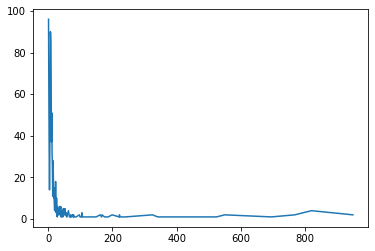

In [156]:
RW_degrees(user_id,1000)

It is very interesting that most users have around 50 friends. However, there are some users that have a huge amount of friends, over 500.

It is possible that the high degree nodes are sampled more frequently. As we can see the user that have above 300 friends on Facebook are less than 20 years old! Hence, this theory is very probable. 


In [176]:
# Random Walk algorithm. N defines the number of users we want to visit.
def RW_updated(source_node, N):
    # use the same seed
    random.seed(0)
    
    current_node = source_node
    i = 0
    ages = []
    degrees = []
    while (i<N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=current_node)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        # Get age of current node and append it to the list of ages

        current_age = data['age']
        ages.append(current_age)

        current_degree = len(data['friends'])
        degrees.append(current_degree)

        # Choose at random a friend of the current node
        current_node = random.choice(data['friends'])
        i += 1

    normalized = np.divide(ages, degrees)

    average = sum(normalized) / sum(np.divide(np.ones_like(degrees), degrees))
    print('Updated average age', average)
    print('Round up', np.around(average))


In [177]:
RW_updated(user_id, 100)

Updated average age 45.95640093752468
Round up 46.0


This way, the age is on the average given by the study.